In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

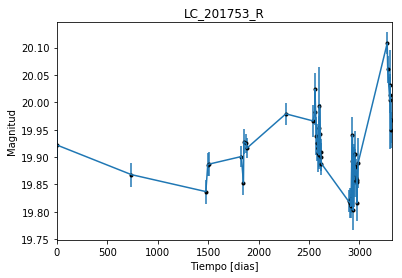

In [2]:
data = np.genfromtxt('LC_201753_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_201753_R')
plt.savefig("LC_201753_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

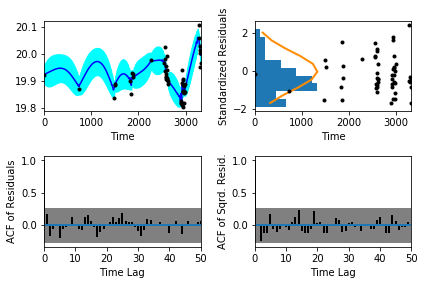

In [5]:
sample.assess_fit()

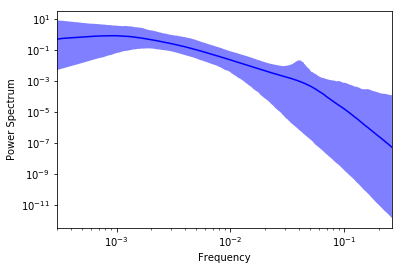

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

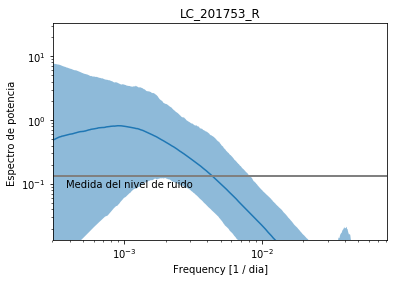

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_201753_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_201753_R')

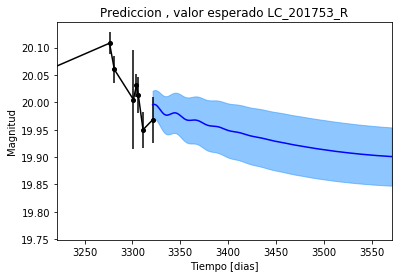

In [12]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_201753_R')

Text(0.5,1,'Prediccion, Caminos simulados LC_201753_R')

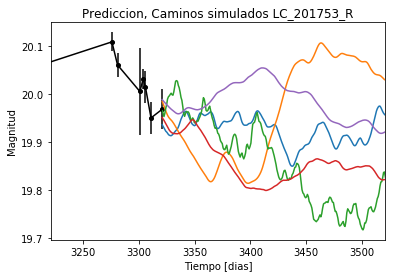

In [13]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_201753_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


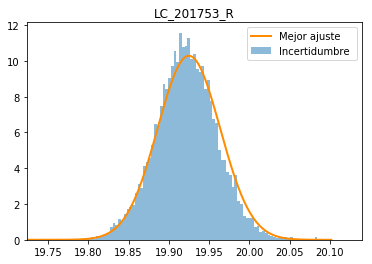

In [14]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_201753_R')
plt.savefig("Mejor_ajuste_LC_201753_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_201753_R')

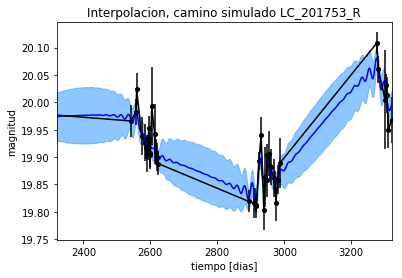

In [15]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_201753_R')

Text(0.5,1,'Interpolacion, camino simulado LC_201753_R')

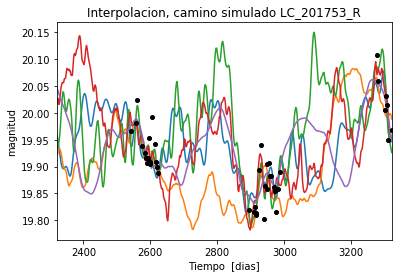

In [16]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_201753_R')

In [17]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [18]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 781.31611624
Median: 0.0186157759222
Standard deviation: 0.108355950611
68% credibility interval: [ 0.00199008  0.12228061]
95% credibility interval: [ 0.00049572  0.42668366]
99% credibility interval: [  3.36091057e-04   5.00856148e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 501.454365501
Median: 0.00440624693086
Standard deviation: 0.0579256715014
68% credibility interval: [ 0.00080478  0.03985658]
95% credibility interval: [ 0.00036793  0.21224437]
99% credibility interval: [  3.13774973e-04   3.91271226e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 291.164192937
Median: 0.0185826977838
Standard deviation: 

In [19]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1410.59556849
Median: 114.334612478
Standard deviation: 1.94507667925
68% credibility interval: [ 112.19441907  115.90310319]
95% credibility interval: [ 109.4813311  117.1125617]
99% credibility interval: [ 107.58168911  117.88879002]


In [20]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 180.442331762
Median: 0.572591772985
Standard deviation: 1.21933898672
68% credibility interval: [ 0.10885782  2.30666205]
95% credibility interval: [ 0.02765618  4.39330506]
99% credibility interval: [ 0.01567615  5.89776255]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 497.629603123
Median: 0.274081512404
Standard deviation: 2.73083218279
68% credibility interval: [ 0.0500388   2.83384981]
95% credibility interval: [  3.81192222e-0

In [21]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: nan
Median: 5.32915140691e+14
Standard deviation: inf
68% credibility interval: [  6.85114003e-50   1.75394331e+89]
95% credibility interval: [  8.49450176e-134   8.15673567e+149]
99% credibility interval: [  3.08834351e-187   5.95248122e+152]


In [22]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2457.96942487
Median: 19.9185137164
Standard deviation: 0.0267200460594
68% credibility interval: [ 19.89596901  19.93999783]
95% credibility interval: [ 19.86347271  19.97053166]
99% credibility interval: [ 19.82641657  20.00362134]


In [23]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 2197.70574517
Median: 0.038525066079
Standard deviation: 0.125948400927
68% credibility interval: [ 0.          0.20146278]
95% credibility interval: [ 0.          0.45339048]
99% credibility interval: [ 0.          0.51053161]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 2197.70574517
Median: 0.038525066079
Standard deviation: 0.125948400927
68% credibility interval: [ 0.          0.20146278]
95% credibility interval: [ 0.          0.45339048]
99% credibility interval: [ 0.          0.51053161]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 447.340730904
Median: 0.0
Standard deviation: 0.00104195213139
68% credi

In [24]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1410.59556849
Median: 114.334612478
Standard deviation: 1.94507667925
68% credibility interval: [ 112.19441907  115.90310319]
95% credibility interval: [ 109.4813311  117.1125617]
99% credibility interval: [ 107.58168911  117.88879002]


In [25]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1171.83732417
Median: 0.00552941998927
Standard deviation: 0.00520350633199
68% credibility interval: [ 0.0035097   0.00991572]
95% credibility interval: [ 0.00244776  0.01879172]
99% credibility interval: [ 0.00178592  0.02992326]


In [26]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 870.445178028
Median: 0.968858570309
Standard deviation: 0.177226049509
68% credibility interval: [ 0.8137534   1.16386028]
95% credibility interval: [ 0.68886633  1.38004493]
99% credibility interval: [ 0.61646379  1.52100784]


In [27]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1079.82670777
Median: 1.26618815099e-17
Standard deviation: 0.0187657114428
68% credibility interval: [  3.89381657e-92   1.46183476e-03]
95% credibility interval: [  1.97315074e-152   4.19799451e-002]
99% credibility interval: [  2.00970153e-155   1.49358227e-001]


In [28]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 781.31611624
Median: (-0.116966369756-2.31161658315j)
Standard deviation: 1.04391699986
68% credibility interval: [-0.76831171-2.72093975j -0.01250403-1.5261569j ]
95% credibility interval: [-2.68093249+0.j         -0.00311468-0.26487151j]
99% credibility interval: [ -3.14697199e+00+0.j          -2.11172239e-03-0.55243688j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 501.454365501
Median: (-0.0276852659758+0.106657201961j)
Standard deviation: 0.871040386141
68% credibility interval: [-0.25042628+1.04335311j -0.00505660+0.j        ]
95% credibility interval: [-1.33357069+0.90676539j -0.00231175+0.j        ]
99% credibility interval: [ -2.45842962e+00+3.26557546j  -1.97150630e-03+0.j        ]
Posterior summary for pa